In [45]:
import numpy as np
import matplotlib.pyplot as plt
import pylab as p
import time
import sys
import os
import itertools
from collections import Counter
from astropy.table import Table, Column, MaskedColumn
from astropy.io import ascii
import pickle

## DATA FROM LG_00_06

In [46]:
cd '/Users/valle/Desktop/CLUESLAB/data_tables'

/Users/valle/Desktop/CLUESLAB/data_tables


In [47]:
dataLG_em7 = np.loadtxt('0006_em7_table_LG')
dataM31_em7 = np.loadtxt('0006_em7_table_M31')
dataMW_em7 = np.loadtxt('0006_em7_table_MW')

dataLG_em8 = np.loadtxt('0006_em8_table_LG')
dataM31_em8 = np.loadtxt('0006_em8_table_M31')
dataMW_em8 = np.loadtxt('0006_em8_table_MW')

dataLG_LCDM = np.loadtxt('0006_LCDM_table_LG')
dataM31_LCDM  = np.loadtxt('0006_LCDM_table_M31')
dataMW_LCDM = np.loadtxt('0006_LCDM_table_MW')

In [64]:
cd '/Users/valle/Desktop/CLUESLAB'

/Users/valle/Desktop/CLUESLAB


## DATA FROM LG_00_06 HIGH DEFINITION

In [48]:
#dataLG_em7 = np.loadtxt('0006_high_em7_table_LG')
#dataM31_em7 = np.loadtxt('0006_high_em7_table_M31')
#dataMW_em7 = np.loadtxt('0006_high_em7_table_MW')

#dataLG_em8 = np.loadtxt('0006_high_em8_table_LG')
#dataM31_em8 = np.loadtxt('0006_high_em8_table_M31')
#dataMW_em8 = np.loadtxt('0006_high_em8_table_MW')

#dataLG_LCDM = np.loadtxt('0006_high_LCDM_table_LG')
#dataM31_LCDM  = np.loadtxt('0006_high_LCDM_table_M31')
#dataMW_LCDM = np.loadtxt('0006_high_LCDM_table_MW')

## DATA FROM LG_24_13

In [49]:
#dataLG_em7 = np.loadtxt('2413_em7_table_LG')
#dataM31_em7 = np.loadtxt('2413_em7_table_M31')
#dataMW_em7 = np.loadtxt('2413_em7_table_MW')

#dataLG_em8 = np.loadtxt('2413_em8_table_LG')
#dataM31_em8 = np.loadtxt('2413_em8_table_M31')
#dataMW_em8 = np.loadtxt('2413_em8_table_MW')

#dataLG_LCDM = np.loadtxt('2413_LCDM_table_LG')
#dataM31_LCDM  = np.loadtxt('2413_LCDM_table_M31')
#dataMW_LCDM = np.loadtxt('2413_vLCDM_table_MW')


PARAMETERS

In [50]:
#Minimum number of dark matter particles required in the halo 
#(min_n_dm = n_particles - n_gas - n_stars)
MIN_N_DM = 10
#Minimum number of stars in the halo for it to be considered a luminous galaxy
MIN_N_STARS = 1
#hubble constant
h=0.677

a = 3.0
b = 2.5
c = 26

FUNCTIONS

In [51]:
def cleanDataSet(dataset):
    'Input: dataset'
    'Return: cleaned dataset'
    'FUNCTION: Cleans the dataset selected from the halos that are fake i.e. not fullfill MIN_N_DM'
    dirty_indexes = []
    for idx, i in enumerate(dataset):
        if (dataset[idx][4] - dataset[idx][43] - dataset[idx][63]) < MIN_N_DM:
            dirty_indexes.append(idx)
    print('number of halos removed in', len(dirty_indexes))
    dataset = np.delete(dataset, (dirty_indexes), axis=0)
    return dataset

In [52]:
def selectSatellites(dataset):
    'Input: dataset'
    'Returns: [list] of the halos that are satellites'
    'FUNCTION: creates new list of the halos of the dataset that contain at least MIN_N_STARS' 
    satellites_list = []
    for idx, i in enumerate(dataset):
        if numStars(idx, dataset) > MIN_N_STARS:
            satellites_list.append(dataset[idx])
    return satellites_list

In [53]:
def getMasses(dataset):
    stellar_masses = []
    halo_masses = []
    for idx, i in enumerate(dataset):
        if numStars(idx, dataset) > MIN_N_STARS:
            stellarmass = dataset[idx][86]/h
            halomass = dataset[idx][3]/h
            stellar_masses.append(stellarmass)
            halo_masses.append(halomass)
    return stellar_masses, halo_masses

In [54]:
def numStars(halo_idx, dataset):
    n_stars = dataset[halo_idx][63]
    return int(n_stars)

In [55]:
def createHistogram(dataset):
    counter_dataset = Counter(dataset)
    SORTEDDATASET = sorted(counter_dataset.items())
    SORTEDDATASET.reverse()
    i_counts = 0
    total_cumulative_list = []
    element_cumulative_list = [i[0] for i in SORTEDDATASET]
    for item in SORTEDDATASET:
        i_counts = i_counts + item[1]
        total_cumulative_list.append(i_counts)
        
    return element_cumulative_list, total_cumulative_list

CLEANING OF THE DATA

In [56]:
dataLG_em7 = cleanDataSet(dataLG_em7)
dataM31_em7 = cleanDataSet(dataM31_em7)
dataMW_em7 = cleanDataSet(dataMW_em7)
dataLG_em8 = cleanDataSet(dataLG_em8)
dataM31_em8 = cleanDataSet(dataM31_em8)
dataMW_em8 = cleanDataSet(dataMW_em8)
dataLG_LCDM = cleanDataSet(dataLG_LCDM)
dataM31_LCDM = cleanDataSet(dataM31_LCDM)
dataMW_LCDM = cleanDataSet(dataMW_LCDM)

number of halos removed in 22
number of halos removed in 9
number of halos removed in 10
number of halos removed in 8
number of halos removed in 3
number of halos removed in 3
number of halos removed in 22
number of halos removed in 8
number of halos removed in 11


SELECTING SATELLITES

In [57]:
satellites_LG_em7 = selectSatellites(dataLG_em7)
satellites_M31_em7 = selectSatellites(dataM31_em7)
satellites_MW_em7 = selectSatellites(dataMW_em7)

satellites_LG_em8 = selectSatellites(dataLG_em8)
satellites_M31_em8 = selectSatellites(dataM31_em8)
satellites_MW_em8 = selectSatellites(dataMW_em8)

satellites_LG_LCDM = selectSatellites(dataLG_LCDM)
satellites_M31_LCDM = selectSatellites(dataM31_LCDM)
satellites_MW_LCDM = selectSatellites(dataMW_LCDM)

In [58]:
masses_halos_LG_em7 = [i[3]/h for i in dataLG_em7]
masses_halos_M31_em7 = [i[3]/h for i in dataM31_em7]
masses_halos_MW_em7 = [i[3]/h for i in dataMW_em7]

masses_halos_LG_em8 = [i[3]/h for i in dataLG_em8]
masses_halos_M31_em8 = [i[3]/h for i in dataM31_em8]
masses_halos_MW_em8 = [i[3]/h for i in dataMW_em8]

masses_halos_LG_LCDM = [i[3]/h for i in dataLG_LCDM]
masses_halos_M31_LCDM = [i[3]/h for i in dataM31_LCDM]
masses_halos_MW_LCDM = [i[3]/h for i in dataMW_LCDM]

In [71]:
masses_satellites_baryons_LG_em7, masses_satellites_darkmatter_LG_em7 = getMasses(dataLG_em7)
masses_satellites_baryons_M31_em7, masses_satellites_darkmatter_M31_em7 = getMasses(dataM31_em7)
masses_satellites_baryons_MW_em7, masses_satellites_darkmatter_MW_em7 = getMasses(dataMW_em7)

masses_satellites_baryons_LG_em8, masses_satellites_darkmatter_LG_em8 = getMasses(dataLG_em8)
masses_satellites_baryons_M31_em8, masses_satellites_darkmatter_M31_em8 = getMasses(dataM31_em8)
masses_satellites_baryons_MW_em8, masses_satellites_darkmatter_MW_em8 = getMasses(dataMW_em8)

masses_satellites_baryons_LG_LCDM, masses_satellites_darkmatter_LG_LCDM = getMasses(dataLG_LCDM)
masses_satellites_baryons_M31_LCDM, masses_satellites_darkmatter_M31_LCDM = getMasses(dataM31_LCDM)
masses_satellites_baryons_MW_LCDM, masses_satellites_darkmatter_MW_LCDM = getMasses(dataMW_LCDM)

## FIGURES

In [72]:
cd '/Users/valle/Desktop/CLUESLAB/figures'

/Users/valle/Desktop/CLUESLAB/figures


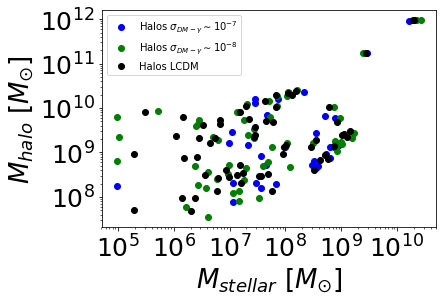

In [73]:
plt.loglog(masses_satellites_baryons_LG_em7, masses_satellites_darkmatter_LG_em7, 'bo', label='Halos $\sigma_{DM-\gamma} \sim 10^{-7}$', linewidth=a)
plt.loglog(masses_satellites_baryons_LG_em8, masses_satellites_darkmatter_LG_em8, 'go', label='Halos $\sigma_{DM-\gamma} \sim 10^{-8}$', linewidth=a)
plt.loglog(masses_satellites_baryons_LG_LCDM, masses_satellites_darkmatter_LG_LCDM, 'ko', label='Halos LCDM', linewidth=a)

plt.rc('xtick', color='k', labelsize='xx-large')
plt.rc('ytick', color='k', labelsize='xx-large')
plt.xticks(size=25)
plt.yticks(size=25)
plt.xlabel('$M_{stellar}$ [$M_{\odot}$]', fontsize=c)
plt.ylabel('$M_{halo}$ [$M_{\odot}$]', fontsize=c)
plt.legend(fontsize=10)

In [74]:
xhist_masses_halos_LG_em7, yhist_masses_halos_LG_em7 = createHistogram(masses_halos_LG_em7)
xhist_masses_halos_LG_em8, yhist_masses_halos_LG_em8 = createHistogram(masses_halos_LG_em8)
xhist_masses_halos_LG_LCDM, yhist_masses_halos_LG_LCDM = createHistogram(masses_halos_LG_LCDM)

xhist_masses_satellites_baryons_LG_em7, yhist_masses_satellites_baryons_LG_em7 = createHistogram(masses_satellites_baryons_LG_em7)
xhist_masses_satellites_baryons_LG_em8, yhist_masses_satellites_baryons_LG_em8 = createHistogram(masses_satellites_baryons_LG_em8)
xhist_masses_satellites_baryons_LG_LCDM, yhist_masses_satellites_baryons_LG_LCDM = createHistogram(masses_satellites_baryons_LG_LCDM)

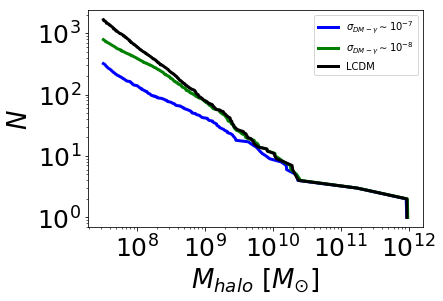

In [75]:
plt.loglog(xhist_masses_halos_LG_em7, yhist_masses_halos_LG_em7, 'b-', label='$\sigma_{DM-\gamma} \sim 10^{-7}$', linewidth=a)
plt.loglog(xhist_masses_halos_LG_em8, yhist_masses_halos_LG_em8, 'g-', label='$\sigma_{DM-\gamma} \sim 10^{-8}$', linewidth=a)
plt.loglog(xhist_masses_halos_LG_LCDM, yhist_masses_halos_LG_LCDM, 'k-', label='LCDM', linewidth=a)

plt.rc('xtick', color='k', labelsize='xx-large')
plt.rc('ytick', color='k', labelsize='xx-large')
plt.xticks(size=25)
plt.yticks(size=25)
plt.xlabel('$M_{halo}$ [$M_{\odot}$]', fontsize=c)
plt.ylabel('$N$', fontsize=c)
plt.legend(fontsize=10)
fig.savefig('hist_masses_halos.jpeg', dpi=500, optimize=True, bbox_inches='tight')

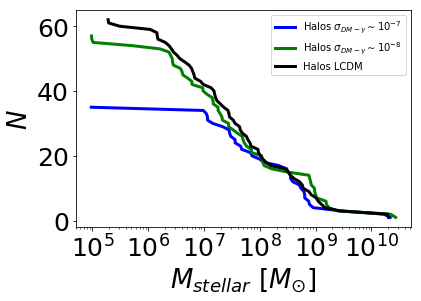

In [80]:
fig = plt.figure()
plt.semilogx(xhist_masses_satellites_baryons_LG_em7, yhist_masses_satellites_baryons_LG_em7, 'b-', label='Halos $\sigma_{DM-\gamma} \sim 10^{-7}$', linewidth=a)
plt.semilogx(xhist_masses_satellites_baryons_LG_em8, yhist_masses_satellites_baryons_LG_em8, 'g-', label='Halos $\sigma_{DM-\gamma} \sim 10^{-8}$', linewidth=a)
plt.semilogx(xhist_masses_satellites_baryons_LG_LCDM, yhist_masses_satellites_baryons_LG_LCDM, 'k-', label='Halos LCDM', linewidth=a)
plt.rc('xtick', color='k', labelsize='xx-large')
plt.rc('ytick', color='k', labelsize='xx-large')
plt.xticks(size=25)
plt.yticks(size=25)
plt.xlabel('$M_{stellar}$ [$M_{\odot}$]', fontsize=c)
plt.ylabel('$N$', fontsize=c)
plt.legend(fontsize=10)
fig.savefig('hist_masses_satellites_baryons.jpeg', dpi=500, optimize=True, bbox_inches='tight')